### Forecasting using timeseries
- SARIMAX

In [21]:
## Import necessary libraries

import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [22]:
# Load datasets
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
df.head()

348


,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [23]:
## California Hospitality Industry Employees data - Seasonal time series data

## Data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.


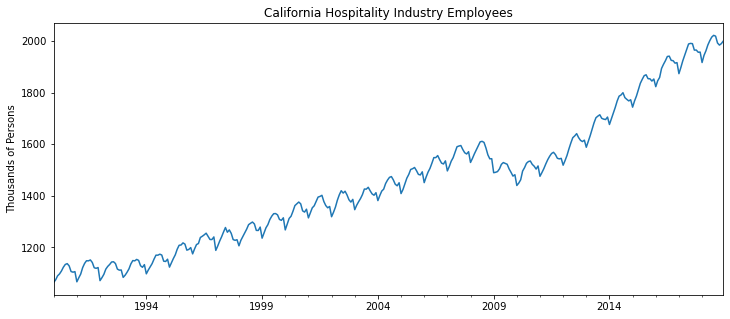

In [24]:
## Plotting timeseries data 

title = 'California Hospitality Industry Employees'
ylabel = 'Thousands of Persons'
xlabel = '' # we don't really need a label here

ax = df['Employees'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [25]:
## ETS Decomposition
## Time series decomposition is the breaking down of the series into its trend, seasonality and noise components. 
## It helps in understanding the time series data better while using it to analyze and forecast
## ETS stands for Error-Trend-Seasonality and is a model used for the time series decomposition. 
## It decomposes the series into the error, trend and seasonality component. 

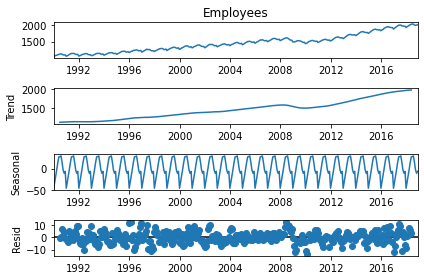

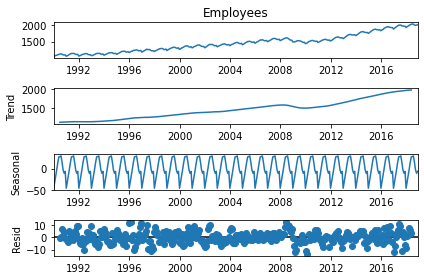

In [12]:
result = seasonal_decompose(df['Employees'], model='add')
result.plot()

In [26]:
## Discovering the optimal order for an ARIMA model
## In Auto ARIMA, the model itself will generate the optimal p, d, and q values 
## which would be suitable for the data set to provide better forecasting.
## Please check the recommended model.

auto_arima(df['Employees'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 08 May 2022   AIC                           2208.504
Time:                                      09:23:44   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9245      0.045     20.596      0.000       0.836       1.012
ma.L1         -0.9441      0.070    -13.552      0.000      -1.081      -0.808
ma.L2          0.1289      0.060      2.152      0.031       0.011       0.246
ar.S.L12       0.9972      0.001    702.591      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.332      0.000      -0.834      -0.664
sigma2        29.2989      1.718     17.058      0.000      25.932      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
## Setting train and test sets

train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [28]:
### Fit a SARIMA(0,1,0)(2,0,0,12) model to the training set

#model = SARIMAX(train['Employees'],order=(0,1,0),seasonal_order=(2,0,0,12))
model = SARIMAX(train['Employees'],order=(1,1,2),seasonal_order=(1, 0, [1], 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Sun, 08 May 2022   AIC                           2128.116
Time:                                      09:25:40   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9240      0.043     21.306      0.000       0.839       1.009
ma.L1         -0.9585      0.070    -13.621      0.000      -1.096      -0.821
ma.L2          0.1499      0.061      2.455      0.014       0.030       0.270
ar.S.L12       0.9973      0.001    729.875      0.000       0.995       1.000
ma.S.L12      -0.7520      0.044    -17.164      0.000      -0.838      -0.666
sigma2        28.7602      1.684     17.083      0.000      25.460      32.060
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
## Obtain predicted values

start=len(train)
end=len(train)+len(test)-1
#predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Predictions')
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,2)(1, 0, [1], 12) Predictions')


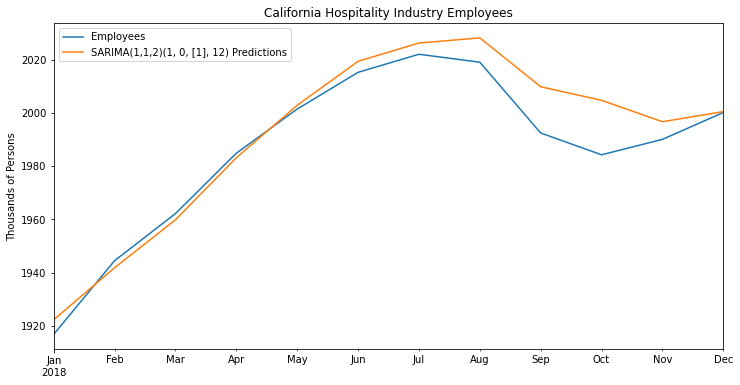

In [30]:
## Plot predictions against known values

title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = test['Employees'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [31]:
## Evaluate the model using MSE and RMSE

error1 = mean_squared_error(test['Employees'], predictions)
error2 = rmse(test['Employees'], predictions)
print(f'SARIMA(1,1,2)(1, 0, [1], 12) MSE Error: {error1:11.10}')
print(f'SARIMA(1,1,2)(1, 0, [1], 12) RMSE Error: {error2:11.10}')

SARIMA(1,1,2)(1, 0, [1], 12) MSE Error:  77.6812342
SARIMA(1,1,2)(1, 0, [1], 12) RMSE Error: 8.813695831


In [32]:
## Retraining the model on full data and forecasting for 1 year in the future

model = SARIMAX(df['Employees'],order=(0,1,0),seasonal_order=(2,0,0,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(1,1,2)(1, 0, [1], 12) Forecast')

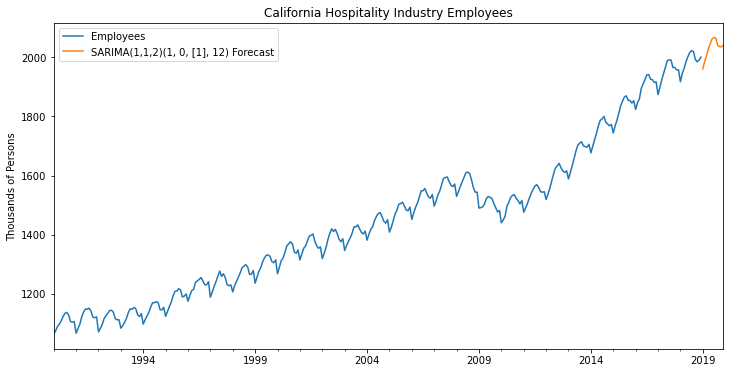

In [33]:
## Plotting forecasted values alongside original data

title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = df['Employees'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Forecasting using timeseries¶
 - Facebook Prophet
 - https://peerj.com/preprints/3190.pdf

In [2]:
#import pandas as pd
#from fbprophet import Prophet